# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
#Import data set and separate columns at ;
train = pd.read_csv("train.csv", delimiter = ';')
test = pd.read_csv("test.csv", delimiter = ';')

In [3]:
# Concatenate the two dataframes vertically (along rows)
Banking_data = pd.concat([train, test], ignore_index=True)

In [4]:
#Get cloumns names
Banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#check for null values
Banking_data.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [6]:
# Save the merged dataframe to a new CSV file
Banking_data.to_csv("Banking_data.csv", index=False)

In [7]:
df = pd.read_csv("Banking_data.csv")

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
#Drop columns with too many unkown values
df.drop(columns = ['contact', 'poutcome'], axis = 'columns', inplace=True)

In [10]:
#Drop unwanted columns
df.drop(columns = ['marital', 'education','default', 'day', 'campaign'], axis = 'columns', inplace=True)

In [11]:
df

,age,job,balance,housing,loan,month,duration,pdays,previous,y
0,58,management,2143,yes,no,may,261,-1,0,no
1,44,technician,29,yes,no,may,151,-1,0,no
2,33,entrepreneur,2,yes,yes,may,76,-1,0,no
3,47,blue-collar,1506,yes,no,may,92,-1,0,no
4,33,unknown,1,no,no,may,198,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
49727,33,services,-333,yes,no,jul,329,-1,0,no
49728,57,self-employed,-3313,yes,yes,may,153,-1,0,no
49729,57,technician,295,no,no,aug,151,-1,0,no
49730,28,blue-collar,1137,no,no,feb,129,211,3,no


In [12]:
#Change prediction column name
df.rename(columns = {'y':'FDcreated'}, inplace=True)

In [13]:
#Rename unclear column names
df.rename(columns = {'housing' : 'housingLoan', 'loan': 'personalLoan'}, inplace=True)

In [14]:
df

,age,job,balance,housingLoan,personalLoan,month,duration,pdays,previous,FDcreated
0,58,management,2143,yes,no,may,261,-1,0,no
1,44,technician,29,yes,no,may,151,-1,0,no
2,33,entrepreneur,2,yes,yes,may,76,-1,0,no
3,47,blue-collar,1506,yes,no,may,92,-1,0,no
4,33,unknown,1,no,no,may,198,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
49727,33,services,-333,yes,no,jul,329,-1,0,no
49728,57,self-employed,-3313,yes,yes,may,153,-1,0,no
49729,57,technician,295,no,no,aug,151,-1,0,no
49730,28,blue-collar,1137,no,no,feb,129,211,3,no


# Encoding

In [15]:
#change yes = 1 no = 0
df['housingLoan'] = df['housingLoan'].map({'yes': 1, 'no':0})
df['personalLoan'] = df['personalLoan'].map({'yes': 1, 'no':0})
df['FDcreated'] = df['FDcreated'].map({'yes': 1, 'no':0})

#Give values for each job and each month
df['job'] = df['job'].map({'admin': 1, 'unknown':2 ,'unemployed':3, 'management':4, 'housemaid':5, 'entrepreneur':6, 'student':7, 'blue-collar':8, 'self-employed':9, 'retired':10, 'technician':11, 'services':12})
df['month'] = df['month'].map({'jan': 1, 'feb':2 ,'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

df

,age,job,balance,housingLoan,personalLoan,month,duration,pdays,previous,FDcreated
0,58,4.0,2143,1,0,5,261,-1,0,0
1,44,11.0,29,1,0,5,151,-1,0,0
2,33,6.0,2,1,1,5,76,-1,0,0
3,47,8.0,1506,1,0,5,92,-1,0,0
4,33,2.0,1,0,0,5,198,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
49727,33,12.0,-333,1,0,7,329,-1,0,0
49728,57,9.0,-3313,1,1,5,153,-1,0,0
49729,57,11.0,295,0,0,8,151,-1,0,0
49730,28,8.0,1137,0,0,2,129,211,3,0


In [16]:
#drop NAN values
df = df.dropna()

# Data Visualizing

(1)Plot of the Created FD Account or not - Count

<BarContainer object of 2 artists>

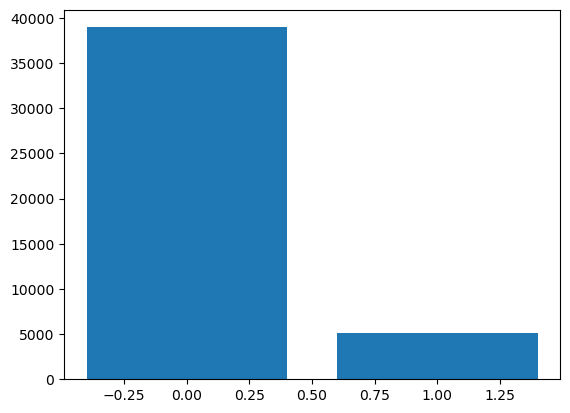

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of 1s and 0s in the 'FDcreated' column
fd_counts = df['FDcreated'].value_counts()

# Create a bar plot
plt.bar(fd_counts.index, fd_counts.values)

# Model Training

In [18]:
#divide dataset into independent and dependent variables
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [19]:
df.to_csv('df.csv', index=False)

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Decision Tree classifier

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create the Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree classifier :", accuracy)

# Create a pickle file for the model
dt_pickle = open('dt_model.pkl', 'wb') 
pickle.dump(dt, dt_pickle)
dt_pickle.close()

Accuracy of Decision Tree classifier : 0.8816804282732964


KNeighbors Classifier

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of KNeighbors Classifier:", knn_accuracy)

# Create a pickle file for the model
knn_pickle = open('knn_model.pkl', 'wb') 
pickle.dump(knn, knn_pickle)
knn_pickle.close()

Accuracy of KNeighbors Classifier: 0.8854913347246166


Linear regression Model

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

# Create the LinearRegression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Make predictions on the test set
reg_pred = reg.predict(X_test)

# Evaluate the model (using Mean Squared Error as it's a regression problem)
mse = mean_squared_error(y_test, reg_pred)
print("Mean Squared Error (MSE) of Linear Regression Model:", mse)

lr_acc = 1-mse
print("Accuracy of Linear regression Model classifier :", lr_acc)

# Create a pickle file for the model
linear_regression_pickle = open('linear_regression_model.pkl', 'wb') 
pickle.dump(reg, linear_regression_pickle)
linear_regression_pickle.close()


Mean Squared Error (MSE) of Linear Regression Model: 0.08170739150249509
Accuracy of Linear regression Model classifier : 0.9182926084975049


Support Vector Machine

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

# Create the SVC model
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
svc_pred = svc.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy of Support Vector Machine:", svc_accuracy)

svc_error = 1 - svc_accuracy
print("Error of Support Vector Machine:", svc_error)

# Create a pickle file for the model
svc_pickle = open('support_vector_machine.pkl', 'wb') 
pickle.dump(svc, svc_pickle)
svc_pickle.close()
